# Assignment 2 - Machine Learning Basics

## Joseph Littell
Netid:  JPL51

Github link: *Link to the github repo with your completed assignment*

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

1. Due to the number of predictors p being small, and the number of n being large, we would have limited flexibility given there are only a limited number of predictors to manipulate. This means that it would generally do worse with a flexible statistical learning method.


2. This example has the opposite problm of the previous one, as the number of predictors p is extremely large. As such, these predictors will allow a flexible model more room to manipulate the predictors. This, however, comes with a caveat that it may potentially lead to overfitting of the model.


3. This is another example of a problem where flexible statitical learning methods would be better. Due to the non-linearity of the relationship between predictors and response, we can assume that more flexibility would be required to fit a model with any accuracy. Linear models typically do better when there is the ability to conduct transformation on the predictors to produce a linear response.


4. If the variance in error terms is high, then we must assume that there is some form of non-linearity occuring as well. As such, flexible models would be able to handle the variance well.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

**(a)** (i) Due to the fact that we want to determine factors affect CEO salary, we can make a determination that this is a _regression_ problem. Simply speaking, the result we want is not a similar binary or categorical choice, which would make it a _classification_ problem.
(ii) Next, this is an _inference_ problem since we are determining factors, not predicting which CEO has what salary
(iii) finally, the sample size n is 500 since we are looking at the top 500 firms in the US, and the predictors p is three continious terms (profit, number of employees, and CEO salary) and one categorical term (industry), for a total of 4 _predictors_.

**(b)** (i) Since this is a binary choice of success or failure, we can lean to a logistic regression, which is a _classification_ problem. 
(ii) As the product has not launced yet, this is a _prediction_ of our products success based upon previous data from other products and their results
(iii) finally, the sample size n is 20 and the predictors p is 13 plus the categorization of success or failure.

**(c)** (i) This is a regression due to the fact that % change of the US dolar in relation to weekly changes is a continious variable.
(ii) It is a _prediction_ model because, well it says we are predicting that % change....
(iii) Our sample size n is 52 for each week in the year 2012. Our predictors p is 4 for each of the % changes in the dollar and US, English, and German markets.


# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

In [172]:
#3a
import numpy as np
import pandas as pd
import time
from sklearn.neighbors import KNeighborsClassifier

##########
# Part A #
##########

# (a) Write your own kNN classifier

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        pass
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.x = x
        self.y = y
        pass
        
    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        
        # Calculate the distance from each vector in x to the training data
        for i in range(x.shape[0]):
            tmp = np.array(x.iloc[i,:])
            j = np.tile(tmp, self.x.shape[0]).reshape((self.x.shape[0], self.x.shape[1]))
            squared = np.sum((j - np.array(self.x))**2, axis = 1).reshape(-1, 1)
            squared = squared.argsort(axis = 0)[:k]
            y_hat.append(self.y.iloc[squared.flatten(),0].mode()[0])
            
        # Return the estimated targets
        return y_hat

# Metric of overall classification accuracy
# (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

##########
# Part B #
##########

# Load the datasets

# Low Dimensional (p = 2 features/predictors) 
x_train_low = pd.read_csv('A2_X_train_low.csv', header = None)
y_train_low = pd.read_csv('A2_y_train_low.csv', header = None)

x_test_low = pd.read_csv('A2_X_test_low.csv', header = None)
y_test_low = pd.read_csv('A2_y_test_low.csv', header = None)

# High Dimensional (p = 100 features/predictors)
x_train_high = pd.read_csv('A2_X_train_high.csv', header = None)
y_train_high = pd.read_csv('A2_y_train_high.csv', header = None)

x_test_high = pd.read_csv('A2_X_test_high.csv', header = None)
y_test_high = pd.read_csv('A2_y_test_high.csv', header = None)

##########
# Part C #
##########

# Train a kNN with K = 5 on each Dataset

# training on the Low Dimensional dataset
LDtime = time.time()                                  # model start time

K5_low = Knn()                                        # initialize the function
K5_low.fit(x_train_low, y_train_low)                  # train the model
K5Pred_low = K5_low.predict(x_test_low, 5)            # make predictions based on the model

LDtime = time.time() - LDtime                         # determine how long the model ran

# training on the High Dimensional dataset
HDtime = time.time()                                  # model start time

K5_high = Knn()                                       # initialize the function
K5_high.fit(x_train_high, y_train_high)               # train the model
K5Pred_high = K5_high.predict(x_test_high, 5)         # make predictions based on the model

HDtime = time.time() - HDtime                         # determine how long the model ran

print("\nPart C:\n")

print("Low Dimension Classification\n")
print("It took [{:.2f}] seconds for the Low Dimensional dataset.".format(LDtime))
print("The accuracy of the model is : [{:.4f}]".format(accuracy(y_test_low.values[:,0], K5Pred_low)))
      
print('\nHigh Dimension Classification\n')
print("It took [{:.2f}] seconds for the High Dimensional dataset.".format(HDtime))
print("The accuracy of the model is : [{:.4f}]".format(accuracy(y_test_high.values[:,0], K5Pred_high)))

##########
# Part D #
##########

# Comparing my kNN vs. SKLearn's

# SKLearn kNN on low Dimensional
SKLDtime = time.time()                                # model start time

SK5_low = KNeighborsClassifier(n_neighbors = 5)       # initialize the function
SK5_low.fit(x_train_low, y_train_low)                 # train the model
SKPred_low = SK5_low.predict(x_test_low)              # make predictions based on the model

SKLDtime = time.time() - SKLDtime                     # determine how long the model ran

# SKLearn kNN on High Dimensional
SKHDtime = time.time()                                # model start time

SK5_high = KNeighborsClassifier(n_neighbors = 5)      # initialize the function
SK5_high.fit(x_train_high, y_train_high)              # train the model
SKPred_high = SK5_high.predict(x_test_high)           # make predictions based on the model

SKHDtime = time.time() - SKHDtime                     # determine how long the model ran

print("\n\nPart D:\n")

print("Low Dimension Classification\n")
print("It took [{:.2f}] seconds for the Low Dimensional dataset.".format(SKHDtime))
print("The accuracy of the model is : [{:.4f}]".format(accuracy(y_test_low.values[:,0], SKPred_low)))

lowaccdiff = (accuracy(y_test_low.values[:,0], SKPred_low))/(accuracy(y_test_low.values[:,0], K5Pred_low))
lowtimediff = LDtime/SKLDtime

print("The SKLearn model is [{:.2f}] times faster and [{}] times more accurate".format(lowtimediff, lowaccdiff))

print('\nHigh Dimension Classification\n')
print("It took [{:.2f}] seconds for the High Dimensional dataset.".format(SKHDtime))
print("The accuracy of the model is : [{:.4f}]".format(accuracy(y_test_high.values[:,0], SKPred_high)))

highaccdiff = (accuracy(y_test_high.values[:,0], SKPred_high))/(accuracy(y_test_high.values[:,0], K5Pred_high))
hightimediff = HDtime/SKHDtime

print("The SKLearn model is [{:.2f}] times faster and [{}] times more accurate".format(hightimediff, highaccdiff))

##########
# Part E #
##########

print("\n\nPart E:\n")
print("A draw back of the predictions being slow is that new data may be coming in faster than predictions being made.")
print("In reinforcement learning this would keep the model behind the curve of reality when making new predictions. ")


Part C:

Low Dimension Classification

It took [1.29] seconds for the Low Dimensional dataset.
The accuracy of the model is : [0.9250]

High Dimension Classification

It took [2.00] seconds for the High Dimensional dataset.
The accuracy of the model is : [0.9930]


C:\Users\josep\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:92: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\josep\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Part D:

Low Dimension Classification

It took [0.46] seconds for the Low Dimensional dataset.
The accuracy of the model is : [0.9250]
The SKLearn model is [187.81] times faster and [1.0] times more accurate

High Dimension Classification

It took [0.46] seconds for the High Dimensional dataset.
The accuracy of the model is : [0.9930]
The SKLearn model is [4.38] times faster and [1.0] times more accurate


Part E:

A draw back of the predictions being slow is that new data may be coming in faster than predictions being made.
In reinforcement learning this would keep the model behind the curve of reality when making new predictions. 


## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [176]:
import numpy as np
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

x_test = np.array([[0, 0, 0]])

##########
# Part A #
##########

# Compute the euclidean distance

# Compute the distances using distance function in scipy.spatial
distance1 = distance.euclidean(x_test, X[0])
distance2 = distance.euclidean(x_test, X[1])
distance3 = distance.euclidean(x_test, X[2])
distance4 = distance.euclidean(x_test, X[3])
distance5 = distance.euclidean(x_test, X[4])
distance6 = distance.euclidean(x_test, X[5])

# print results
print("\nPart A:\n")
print("Obs       Distance")
print("1         {}".format(distance1))
print("2         {}".format(distance2))
print("3         {:.2f}".format(distance3))
print("4         {:.2f}".format(distance4))
print("5         {:.2f}".format(distance5))
print("6         {:.2f}".format(distance6))

##########
# Part B #
##########

# Make a prediction based on K = 1
k1model = KNeighborsClassifier(n_neighbors = 1)     
k1model.fit(X, y)
print("\n\nPart B:\n")
print("The prediction for when k = 1 is {}".format(k1model.predict(x_test)))
print("The reason we get a prediction of Blue is because the closest observation is #6")
print("which is also blue")

##########
# Part C #
##########

#  Make a prediction based on K = 3
k3model = KNeighborsClassifier(n_neighbors = 3)
k3model.fit(X, y)
print("\n\nPart C:\n")
print("The prediction for when k = 1 is {}".format(k3model.predict(x_test)))
print("The reason we get a prediction of Red is because the closest observations are #4, 5, 6")
print("#4 and #5 are red, while #6 is blue. Since 2 is greater that 1, our prediction is red.")

##########
# Part D #
##########

# Bayes Decision Boundry Question
print("\n\nPart D:\n")
print("If Bayes Decision boundry is highly non linear, than the assumption would be that the best K")
print("for the model would be small, which would allow for a high flexibility to mimic the high")
print("non linearity.")


Part A:

Obs       Distance
1         3.0
2         2.0
3         3.16
4         2.24
5         1.41
6         1.73


Part B:

The prediction for when k = 1 is ['b']
The reason we get a prediction of Blue is because the closest observation is #6
which is also blue


Part C:

The prediction for when k = 1 is ['r']
The reason we get a prediction of Red is because the closest observations are #4, 5, 6
#4 and #5 are red, while #6 is blue. Since 2 is greater that 1, our prediction is red.


Part D:

If Bayes Decision boundry is highly non linear, than the assumption would be that the best K
for the model would be small, which would allow for a high flexibility to mimic the high
non linearity.


## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**


Part B:




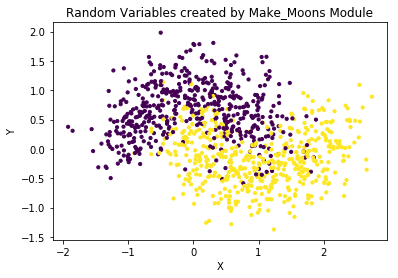


Part D:




<Figure size 1008x1008 with 0 Axes>

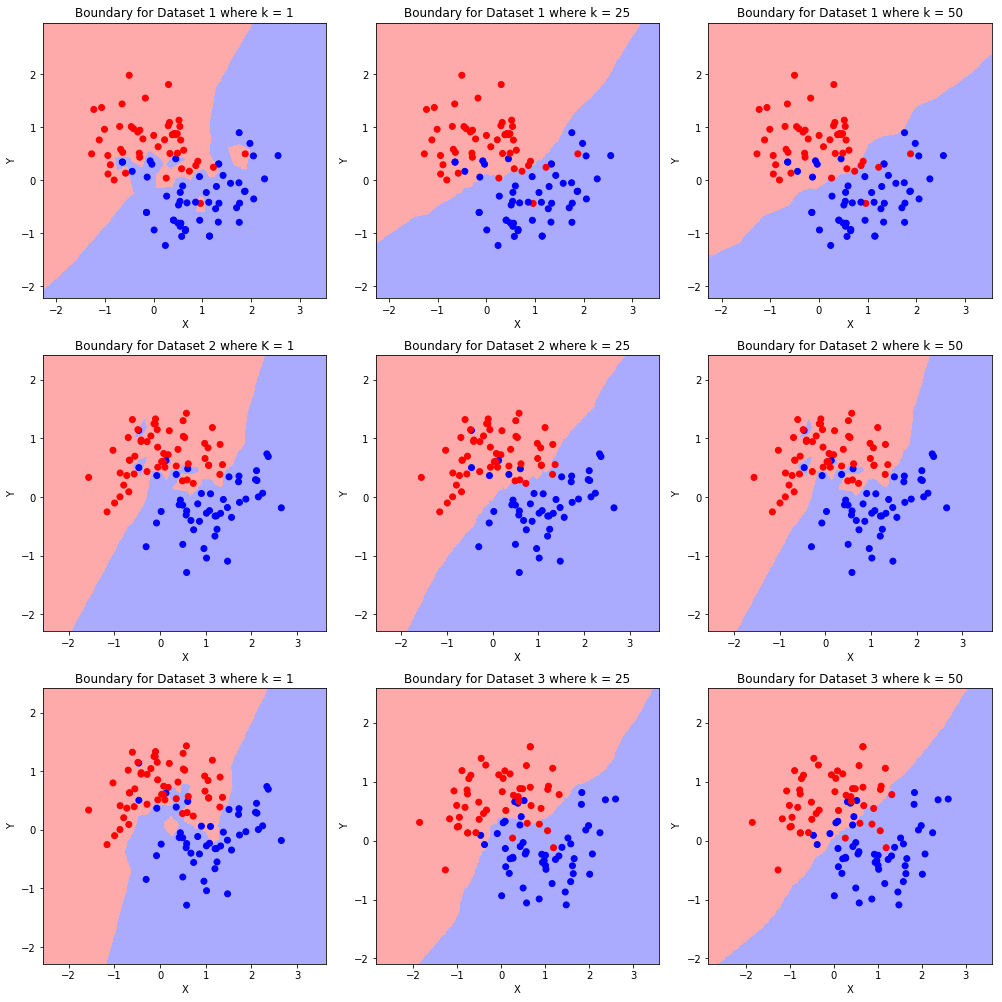



Part E:

Down the columns there is a slight difference between the models due to the new inputs.
This variance decreases across the row as K increases from left to right.
As such, K = 1 is the most volitile as the datasets change.


Part F:

In my opinion, K = 25 is the best classifier amongs the three.
This is because it has enough variance to generalize the dataset,
unlike K = 1 which changes dramatically per sampling, or K = 50
which reminds incredibly rigid despite sampling.


In [175]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from pylab import rcParams
%matplotlib inline

##########
# Part A #
##########

# Create a dataset using the "make_moons" module of SKlearn
x,y = make_moons(n_samples = 1000, noise = 0.35)

##########
# Part B #
##########

# plot the samples created
print("\nPart B:\n\n")
plt.scatter(x[:,0], x[:,1], c = y, s = 10)
plt.title("Random Variables created by Make_Moons Module")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

##########
# Part C #
##########

# Create Three Datasets to use in our different models

# Dataset 1
randnum = np.random.randint(0, 999, 100)
x1 = x[randnum]
y1 = y[randnum]

# Dataset 2
randnum = np.random.randint(0, 999, 100)
x2 = x[randnum]
y2 = y[randnum]

# Dataset 3
randnum = np.random.randint(0, 999, 100)
x3 = x[randnum]
y3 = y[randnum]

##########
# Part D #
##########

# set the parameters of the graph so that everything will line up correctly
rcParams['figure.figsize'] = 14, 14
rcParams['figure.constrained_layout.h_pad'] =  1
rcParams['figure.constrained_layout.w_pad'] =  1

# Plot Nine Grids in a 3x3 Fashion that includes decision bounds for Knn

print("\nPart D:\n\n")

# prepare a plot with 3x3 of subplots
plt.figure()
plt.subplots(3, 3)

#############
# DATASET 1 #
#############

# DATASET 1; K = 1

#fit the model
D1K1 = KNeighborsClassifier(n_neighbors = 1)
D1K1.fit(x1, y1)

# Top left Subplot
plt.subplot(331)

# create a mesh grid to print boundry lines 
# (taken from https://stackoverflow.com/questions/45075638/graph-k-nn-decision-boundaries-in-matplotlib)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# step size in the mesh
h = 0.02

# Plot the decision boundary. For that, we will assign a color to each 
# point in the mesh [x_min, x_max]x[y_min, y_max]

xx, yy = np.meshgrid(np.arange(-2, 3),np.arange(-2, 2))

x_min, x_max = x1[:, 0].min() - 1, x1[:, 0].max() + 1
y_min, y_max = x1[:, 1].min() - 1, x1[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Put the result into a color plot
Z = D1K1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

# Plot the training points
plt.scatter(x1[:, 0], x1[:, 1], c= y1, cmap = cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Plot the labels
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Boundary for Dataset 1 where k = 1")

# DATASET 1; K = 25

# fit the model
D1K25 = KNeighborsClassifier(n_neighbors = 25)
D1K25.fit(x1, y1)

# Top Middle Subplot
plt.subplot(332)

# create a mesh grid to print boundry lines 
# (taken from https://stackoverflow.com/questions/45075638/graph-k-nn-decision-boundaries-in-matplotlib)

# Plot the decision boundary. For that, we will assign a color to each 
# point in the mesh [x_min, x_max]x[y_min, y_max]

xx, yy = np.meshgrid(np.arange(-2, 3),np.arange(-2, 2))

x_min, x_max = x1[:, 0].min() - 1, x1[:, 0].max() + 1
y_min, y_max = x1[:, 1].min() - 1, x1[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Put the result into a color plot
Z = D1K25.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

# Plot the training points
plt.scatter(x1[:, 0], x1[:, 1], c= y1, cmap = cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Plot the labels
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Boundary for Dataset 1 where k = 25")

# DATASET 1; K = 50

# fit the model
D1K50 = KNeighborsClassifier(n_neighbors = 50)
D1K50.fit(x1, y1)

# Top Right Subplot
plt.subplot(333)

# create a mesh grid to print boundry lines 
# (taken from https://stackoverflow.com/questions/45075638/graph-k-nn-decision-boundaries-in-matplotlib)

# Plot the decision boundary. For that, we will assign a color to each 
# point in the mesh [x_min, x_max]x[y_min, y_max]

xx, yy = np.meshgrid(np.arange(-2, 3),np.arange(-2, 2))

x_min, x_max = x1[:, 0].min() - 1, x1[:, 0].max() + 1
y_min, y_max = x1[:, 1].min() - 1, x1[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Put the result into a color plot
Z = D1K50.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

# Plot the training points
plt.scatter(x1[:, 0], x1[:, 1], c= y1, cmap = cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Plot the labels
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Boundary for Dataset 1 where k = 50")

#############
# DATASET 2 #
#############

# DATASET 2; K = 1

# fit the model
D2K1 = KNeighborsClassifier(n_neighbors = 1)
D2K1.fit(x2, y2)

# Middle Left Subplot
plt.subplot(334)

# create a mesh grid to print boundry lines 
# (taken from https://stackoverflow.com/questions/45075638/graph-k-nn-decision-boundaries-in-matplotlib)

# Plot the decision boundary. For that, we will assign a color to each 
# point in the mesh [x_min, x_max]x[y_min, y_max]

xx, yy = np.meshgrid(np.arange(-2, 3),np.arange(-2, 2))

x_min, x_max = x2[:, 0].min() - 1, x2[:, 0].max() + 1
y_min, y_max = x2[:, 1].min() - 1, x2[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Put the result into a color plot
Z = D2K1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

# Plot the training points
plt.scatter(x2[:, 0], x2[:, 1], c= y2, cmap = cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Plot the labels
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Boundary for Dataset 2 where K = 1")

# DATASET 2; K = 25

# fit the model
D2K25 = KNeighborsClassifier(n_neighbors = 25)
D2K25.fit(x2, y2)

# Middle Middle Subplot
plt.subplot(335)

# create a mesh grid to print boundry lines 
# (taken from https://stackoverflow.com/questions/45075638/graph-k-nn-decision-boundaries-in-matplotlib)

# Plot the decision boundary. For that, we will assign a color to each 
# point in the mesh [x_min, x_max]x[y_min, y_max]

xx, yy = np.meshgrid(np.arange(-2, 3),np.arange(-2, 2))

x_min, x_max = x2[:, 0].min() - 1, x2[:, 0].max() + 1
y_min, y_max = x2[:, 1].min() - 1, x2[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Put the result into a color plot
Z = D2K25.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

# Plot the training points
plt.scatter(x2[:, 0], x2[:, 1], c= y2, cmap = cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Plot the labels
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Boundary for Dataset 2 where k = 25")

# DATASET 2; K = 50

# fit the model
D2K50 = KNeighborsClassifier(n_neighbors = 50)
D2K50.fit(x2, y2)

# Middle Right Subplot
plt.subplot(336)

# create a mesh grid to print boundry lines 
# (taken from https://stackoverflow.com/questions/45075638/graph-k-nn-decision-boundaries-in-matplotlib)

# Plot the decision boundary. For that, we will assign a color to each 
# point in the mesh [x_min, x_max]x[y_min, y_max]

xx, yy = np.meshgrid(np.arange(-2, 3),np.arange(-2, 2))

x_min, x_max = x2[:, 0].min() - 1, x2[:, 0].max() + 1
y_min, y_max = x2[:, 1].min() - 1, x2[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Put the result into a color plot
Z = D2K1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

# Plot the training points
plt.scatter(x2[:, 0], x2[:, 1], c= y2, cmap = cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Plot the labels
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Boundary for Dataset 2 where k = 50")

#############
# DATASET 3 #
#############

# DATASET 3; K = 1

# fit the model
D2K50= KNeighborsClassifier(n_neighbors = 1)
D2K50.fit(x3, y3)

# Bottom Left Subplot
plt.subplot(337)

# create a mesh grid to print boundry lines 
# (taken from https://stackoverflow.com/questions/45075638/graph-k-nn-decision-boundaries-in-matplotlib)

# Plot the decision boundary. For that, we will assign a color to each 
# point in the mesh [x_min, x_max]x[y_min, y_max]

xx, yy = np.meshgrid(np.arange(-2, 3),np.arange(-2, 2))

x_min, x_max = x2[:, 0].min() - 1, x2[:, 0].max() + 1
y_min, y_max = x2[:, 1].min() - 1, x2[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Put the result into a color plot
Z = D2K50.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

# Plot the training points
plt.scatter(x2[:, 0], x2[:, 1], c= y2, cmap = cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Plot the labels
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Boundary for Dataset 3 where k = 1")

# DATASET 3; K = 25

# fit the model
D3K25 = KNeighborsClassifier(n_neighbors = 25)
D3K25.fit(x3, y3)

# Bottom Middle Subplot
plt.subplot(338)

# create a mesh grid to print boundry lines 
# (taken from https://stackoverflow.com/questions/45075638/graph-k-nn-decision-boundaries-in-matplotlib)

# Plot the decision boundary. For that, we will assign a color to each 
# point in the mesh [x_min, x_max]x[y_min, y_max]

xx, yy = np.meshgrid(np.arange(-2, 3),np.arange(-2, 2))

x_min, x_max = x3[:, 0].min() - 1, x3[:, 0].max() + 1
y_min, y_max = x3[:, 1].min() - 1, x3[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Put the result into a color plot
Z = D3K25.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

# Plot the training points
plt.scatter(x3[:, 0], x3[:, 1], c= y3, cmap = cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Plot the labels
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Boundary for Dataset 3 where k = 25")

# DATASET 3; K = 50

# fit the model
D3K50 = KNeighborsClassifier(n_neighbors = 50)
D3K50.fit(x3, y3)

# Bottom Right Subplot
plt.subplot(339)

# create a mesh grid to print boundry lines 
# (taken from https://stackoverflow.com/questions/45075638/graph-k-nn-decision-boundaries-in-matplotlib)

# Plot the decision boundary. For that, we will assign a color to each 
# point in the mesh [x_min, x_max]x[y_min, y_max]

xx, yy = np.meshgrid(np.arange(-2, 3),np.arange(-2, 2))

x_min, x_max = x3[:, 0].min() - 1, x3[:, 0].max() + 1
y_min, y_max = x3[:, 1].min() - 1, x3[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Put the result into a color plot
Z = D3K50.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

# Plot the training points
plt.scatter(x3[:, 0], x3[:, 1], c= y3, cmap = cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Plot the labels
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Boundary for Dataset 3 where k = 50")


plt.tight_layout(pad = 1, w_pad = 1,h_pad = 1)
plt.show()

##########
# Part E #
##########

print("\n\nPart E:\n")
print("Down the columns there is a slight difference between the models due to the new inputs.")
print("This variance decreases across the row as K increases from left to right.")
print("As such, K = 1 is the most volitile as the datasets change.")

##########
# Part F #
##########

print("\n\nPart F:\n")
print("In my opinion, K = 25 is the best classifier amongs the three.")
print("This is because it has enough variance to generalize the dataset,")
print("unlike K = 1 which changes dramatically per sampling, or K = 50")
print("which reminds incredibly rigid despite sampling.")

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**


Part A - C:

We can observe that Accuracy increases until approximately 50, then trends downwards as K increase.


Part D:

Values of K < 50 would be considered high variance, as the allow the most flexibility to get the highest accuracy,
Where as K > 50 will see increasingly greater bias as the flexibility decreasing with the model becoming more rigid.


Part E:

The optimal value of K would be at [10]
This has the maximum accuracy score at [0.88] of the test data
and the minimum error score at [0.12]
inferring we fit the model the correctly.


Part F:

In models other than kNN, the flexibility in the model centers around the parameters of that model.


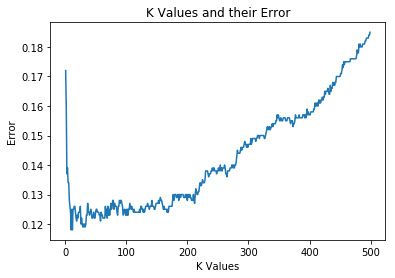

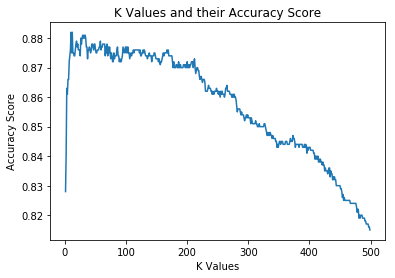

In [174]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score

##########
# Part A #
##########

# create a training and test set using "make_moons"
xtrain, ytrain = x, y 
xtest,ytest = make_moons(n_samples = 1000, noise = 0.35)

##########
# Part B #
##########

# From https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
# Traing KNN for all ranges 1-500
xerrors = range(1, 500)
yerrors = []
accur = []

# create a loop to wal through the K = 1 through K = 500
for i in range(1, 500):
    # create the model using Knn
    Kmodel = KNeighborsClassifier(n_neighbors = i)
    # fit the model using training data
    Kmodel.fit(xtrain, ytrain)
    # make predictions using the model and the test set
    predictions = Kmodel.predict(xtest)
    # calculate the error
    yerrors.append(np.mean(predictions != ytest))
    # calculate the accuracy of the model
    accur.append(accuracy_score(ytest, predictions))

##########
# Part C #
##########    
    
print("\nPart A - C:")    
plt.figure(1)
plt.title("K Values and their Error")
plt.xlabel("K Values")
plt.ylabel("Error")
plt.plot(xerrors, yerrors) 
plt.show

plt.figure(2)
plt.title("K Values and their Accuracy Score")
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.plot(xerrors, accur) 
plt.show

print("\nWe can observe that Accuracy increases until approximately 50, then trends downwards as K increase.")

##########
# Part D #
##########

print("\n\nPart D:\n")
print("Values of K < 50 would be considered high variance, as the allow the most flexibility to get the highest accuracy,")
print("Where as K > 50 will see increasingly greater bias as the flexibility decreasing with the model becoming more rigid.")

# determine max K value
accurmaxinx = accur.index(max(accur))

##########
# Part E #
##########

print("\n\nPart E:\n")
print("The optimal value of K would be at [{}]".format(xerrors[accurmaxinx]))
print("This has the maximum accuracy score at [{:.2f}] of the test data".format(max(accur)))
print("and the minimum error score at [{:.2f}]".format(min(yerrors)))
print("inferring we fit the model the correctly.")

print("\n\nPart F:\n")
print("In models other than kNN, the flexibility in the model centers around the parameters of that model.")

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?



Part A:


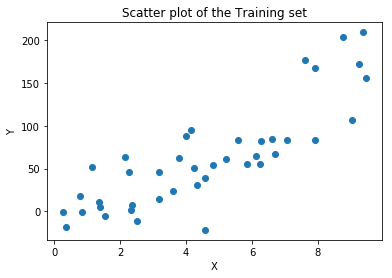



Part B: 

The equation for the line is: 
Y = 18.30x + -21.73

The r^2 is: 
0.70

The MSE is: 
1052.59


Part C: 

The equation for the line is: 
Y = 1.88x + 8.89 + (x)^2

The r^2 is: 
0.75

The MSE is: 
884.91


Part D:


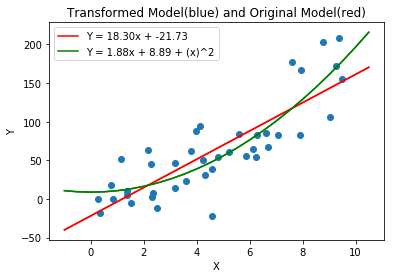



Part E:

Original Model
The r^2 is: 
0.56

The MSE is: 
2023.31

Transformed Model
The r^2 is: 
0.69

The MSE is: 
1389.82


Part F: The tansformed model has a lower MSE and a higher R2, indicating that it preformed better
on the testing dataset than the original model. This notion holds true on the training data as well


Part G:

If there were radical differences between the training and test sets, it would make it extremely difficult to make
accurate predictions as our regression would not be able model the data correctly


In [173]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

from sklearn.linear_model import LinearRegression
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

##########
# Part A #
##########

# Create a scatter of x_train and y_train

print("\n\nPart A:")
plt.scatter(x_train, y_train)
plt.title('Scatter plot of the Training set')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

##########
# Part B #
##########

# Create the initial model

# Reshape the data so it can be used in the linear regression function
xtr = np.array(x_train).reshape(-1, 1)
ytr = np.array(y_train).reshape(-1, 1)

# fit the linear regression on the training data
reg1 = LinearRegression().fit(xtr, ytr)

# call for R^2
r2 = reg1.score(xtr, ytr)

#determine MSE
ypred = (reg1.predict(xtr))
MSE = mean_squared_error(np.array(ytr), ypred)

# output the findings
print("\n\nPart B: \n")
print("The equation for the line is: \nY = {:.2f}x + {:.2f}".format(reg1.coef_[0][0], reg1.intercept_[0]))
print("")
print("The r^2 is: \n{:.2f}".format(r2))
print("")
print("The MSE is: \n{:.2f}".format(MSE))

##########
# Part C #
##########

# Adjust the model using transformation

xtrans = ((np.array(x_train))**2).reshape(-1, 1)

# fit the linear regression on the transformed training data
reg2 = LinearRegression().fit(xtrans, ytr)

# call for R^2
r2 = reg2.score(xtrans, ytr)

# determine MSE
ypred = (reg2.predict(xtrans))
MSE = mean_squared_error(np.array(ytr),ypred)

# output the findings
print("\n\nPart C: \n")
print("The equation for the line is: \nY = {:.2f}x + {:.2f} + (x)^2".format(reg2.coef_[0][0], reg2.intercept_[0]))
print("")
print("The r^2 is: \n{:.2f}".format(r2))
print("")
print("The MSE is: \n{:.2f}".format(MSE))

##########
# Part D #
##########

# Plot both models on the initial dataset

xtr = np.arange(-1,11,0.5)

# create the prediction models to plot
model1 = reg1.predict(np.array(xtr).reshape(-1, 1))
model2 = reg2.predict(np.array(xtr**2).reshape(-1, 1))

print("\n\nPart D:")

# plot the initial training data
plt.scatter(x_train, y_train)

# plot the models
plt.title("Transformed Model(blue) and Original Model(red)")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(xtr, model1, label = 'Y = 18.30x + -21.73', color = "red")
plt.plot(xtr, model2, label = 'Y = 1.88x + 8.89 + (x)^2', color = "green")
plt.legend()
plt.plot(xtr, model1, color = "red", linestyle = 'solid')
plt.plot(xtr, model2, color = "green", linestyle = 'solid')
plt.show()

##########
# Part D #
##########

# Estimate on test data

print("\n\nPart E:")

# reshape the arrays so they can be used.
xtestr = np.array(x_test).reshape(-1, 1)
xtestr2 = ((np.array(x_test))**2).reshape(-1, 1)
ytestr = np.array(y_test).reshape(-1, 1)

# call for R^2
testr2 = reg1.score(xtestr, ytestr)
test2r2 = reg2.score(xtestr2, ytestr)

#determine MSE
ypredtest1 = (reg1.predict(xtestr))
MSEtest1 = mean_squared_error(np.array(ytestr), ypredtest1)

ypredtest2 = (reg2.predict(xtestr2))
MSEtest2 = mean_squared_error(np.array(ytestr), ypredtest2)

print("")
print("Original Model")
print("The r^2 is: \n{:.2f}".format(testr2))
print("")
print("The MSE is: \n{:.2f}".format(MSEtest1))

print("\nTransformed Model")
print("The r^2 is: \n{:.2f}".format(test2r2))
print("")
print("The MSE is: \n{:.2f}".format(MSEtest2))

##########
# Part F #
##########

print("\n\nPart F: The tansformed model has a lower MSE and a higher R2, indicating that it preformed better")
print("on the testing dataset than the original model. This notion holds true on the training data as well")

##########
# Part G #
##########

print("\n\nPart G:")
print("\nIf there were radical differences between the training and test sets, it would make it extremely difficult to make")
print("accurate predictions as our regression would not be able model the data correctly")